# Support Vector Machine - Code

In diesem Notebook schauen wir uns die `Support Vector Machine` am Iris Datensatzes an.

Zuerst schauen wir uns die `lineare Support Vector Machine` an. Anschliessend wenden wir den `Kernel Trick` an.

## Setup

Setup Code muss *nicht* verstanden werden.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02, same_aspect=False, ax=None, delta=3):

    if isinstance(y, pd.Series):
        y = y.values

    if isinstance(X, pd.DataFrame):
        X = X.values

    order = ['Setosa', 'Virginica', 'Versicolor']

    palette=dict(zip(
        order,
        sns.color_palette()
    ))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - delta, X[:, 0].max() + delta
    x2_min, x2_max = X[:, 1].min() - delta, X[:, 1].max() + delta
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = OrdinalEncoder(categories=[order]).fit_transform(Z.reshape(-1, 1))
    Z = Z.reshape(xx1.shape)


    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette, ax=ax, zorder=10)

    plt.autoscale(False)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()))

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax

In [30]:
# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['petal length', 'petal width', 'name']].rename(columns={
    'petal length': 'petal length (cm)',  # petal = Blütenblatt
    'petal width': 'petal width (cm)',
})

## Train-Validation Split

Teile Daten in Train-Set und Validation-Set.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_val, y_train, y_val = train_test_split(df[['petal length (cm)', 'petal width (cm)']], df['name'], test_size=0.2)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(120, 2) (30, 2) (120,) (30,)


## Linear Support Vector Machine (`kernel='linear'`)

Die `Support Vector Machine` maximiert den Abstand (Margin) zur Decision Boundary, sprich es misst eine Distanz im Feature Space. Damit diese Distanz unabhängig von der Einheit der Messung ist, müssen wir die Daten zuerst `standard skalieren`!

In [32]:
model = Pipeline([
    ('std', StandardScaler()),
    ('clf', SVC(kernel='linear'))
])
model.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('clf', SVC(kernel='linear'))])

Das trainierte Modell können wir visualisieren.
Man kann die Maximierung vom Abstand gut erkennen bei der Decision Boundary zwischen `Setosa` und `Versicolor`.
Man sieht, dass `sklearn` hier die Soft-Margin Formulierung der `Support Vector Machine` nutzt bei der Decision Boundary zwischen `Versicolor` und `Virginica`, da es Punkte gibt, wo den Abstand verletzen.

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


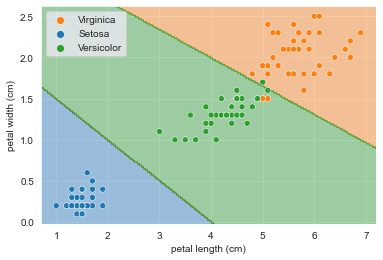

In [33]:
plot_decision_regions(X_train, y_train, model)
plt.show()

Evaluieren auf Train-Set und Val-Set

In [34]:
y_train_hat = model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_val_hat = model.predict(X_val)
accuracy_score_val = accuracy_score(y_val, y_val_hat)
print("Val Set:", f"{accuracy_score_val*100}%")

Train Set: 97.5%
Val Set: 90.0%


### Gelernte Parameter (Extra)

Wir können die gelernten Parameters ($\vec{\beta}$) der `Support Vector Machine` ausgeben.
Wir lernen hier 3 unterschiedliche Modelle, da die `Support Vector Machine`, `One-vs-One` für mehrere Klassen nutzt.

* Ein `Setosa-vs-Versicolor` Modell
* Ein `Setosa-vs-Virginica` Modell
* Ein `Virginica-vs-Versicolor` Modell

Bemerkung: Bei 10 Klassen hätten wir 55 Modelle!

In [35]:
print("beta_1, beta_2:")
print(model['clf'].coef_)
print("beta_0:")
print(model['clf'].intercept_)

beta_1, beta_2:
[[-1.41012269 -1.18919668]
 [-0.77197736 -0.48810167]
 [-1.95722542 -2.40220431]]
beta_0:
[-1.50062127 -0.21227945  3.00088342]


## Non-linear Support Vector Machine (`kernel='rbf'`)

Mittels `Kernel-Trick` können wir nicht lineare Zusammenhänge in den Daten lernen.
Hier verwenden wir den `rbf` Kernel.

In [36]:
model = Pipeline([
    ('std', StandardScaler()),
    ('clf', SVC(kernel='rbf'))
])
model.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('clf', SVC())])

Durch den Kernel-Trick lernen wir eine lineare Decision Boundary in einem höherdimensionalen Raum. Visualisieren wir das Modell im ursprünglichen Input Space, ist diese Decision Boundary nicht-linear.

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


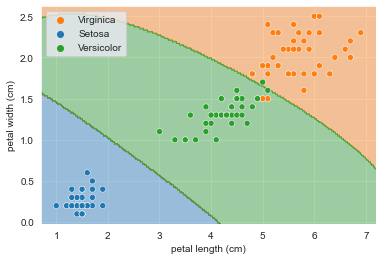

In [37]:
plot_decision_regions(X_train, y_train, model)
plt.show()

Evaluation auf Train-Set und Val-Set:

In [38]:
y_train_hat = model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_val_hat = model.predict(X_val)
accuracy_score_val = accuracy_score(y_val, y_val_hat)
print("Val Set:", f"{accuracy_score_val*100}%")

Train Set: 97.5%
Val Set: 90.0%
